In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [114]:
def trains_basic_info(url):
    ori = pd.read_csv(url+'.csv')
    ori['day'] = [z.split('/')[-1] for z in ori['dteday']]
    ori.pop('dteday') # exact day and month(already have)
    ori.pop('yr') # in the same year
    
    ori['mnth_0'] = [int(int(z) % 2 == 1) for z in ori['mnth']]
    ori['mnth_1'] = [int(int((int(z)/2) % 2) == 1) for z in ori['mnth']]
    ori['mnth_2'] = [int(int((int(z)/4) % 2) % 2 == 1) for z in ori['mnth']]
    ori['mnth_3'] = [int(int((int(z)/8) % 2) % 2 == 1) for z in ori['mnth']]
    
    ori['hour_0'] = [int(int(z) % 2 == 1) for z in ori['hr']]
    ori['hour_1'] = [int(int((int(z)/2) % 2) == 1) for z in ori['hr']]
    ori['hour_2'] = [int(int((int(z)/4) % 2) % 2 == 1) for z in ori['hr']]
    ori['hour_3'] = [int(int((int(z)/8) % 2) % 2 == 1) for z in ori['hr']]
    ori['hour_4'] = [int(int((int(z)/16) % 2) % 2 == 1) for z in ori['hr']]
    ori.pop('hr')
    
    ori['weekday_0'] = [int(int(z) % 2 == 1) for z in ori['weekday']]
    ori['weekday_1'] = [int(int((int(z)/2) % 2) == 1) for z in ori['weekday']]
    ori['weekday_2'] = [int(int((int(z)/4) % 2) % 2 == 1) for z in ori['weekday']]
    ori.pop('weekday')
    
    ori['weather_0'] = [int(int(z-1) % 2 == 1) for z in ori['weathersit']]
    ori['weather_1'] = [int(int((int(z-1)/2) % 2) == 1) for z in ori['weathersit']]
    ori.pop('weathersit')
    
    ori['season_0'] = [int(int(z-1) % 2 == 1) for z in ori['season']]
    ori['season_0'] = [int(int((int(z-1)/2) % 2) == 1) for z in ori['season']]
    ori.pop('season')
    
    ori['day_0'] = [int(int(z) % 2 == 1) for z in ori['day']]
    ori['day_1'] = [int(int((int(z)/2) % 2) == 1) for z in ori['day']]
    ori['day_2'] = [int(int((int(z)/4) % 2) % 2 == 1) for z in ori['day']]
    ori['day_3'] = [int(int((int(z)/8) % 2) % 2 == 1) for z in ori['day']]
    ori['day_4'] = [int(int((int(z)/16) % 2) % 2 == 1) for z in ori['day']]
    ori.pop('day')
    # normalization
    z = ['temp', 'atemp', 'hum', 'windspeed']
    for r in z:
        avg = np.average(w[r])
        std = np.std(w[r])
        ori[r] = [(z-avg)/std  for z in ori[r]]
    ori.to_csv(url+'_.csv',index=False)
    return ori

In [115]:
train = trains_basic_info('train')
test = trains_basic_info('test')

In [17]:
def drawMSE(data, title, xlb = 'iteration number'):
    plt.figure(figsize=(12,5))
    plt.title('MSE in ['+title+']')
    plt.plot(data['iter'], data['train'], 'b-', label=u'MSE in train set')
    plt.plot(data['iter'], data['test'], 'r-', label=u'MSE in validation set')
    plt.legend(loc = 'upper right')
    plt.xlabel(xlb)
    plt.ylabel('MSE')
    plt.show()

# 非SGD神经网络

11496.2


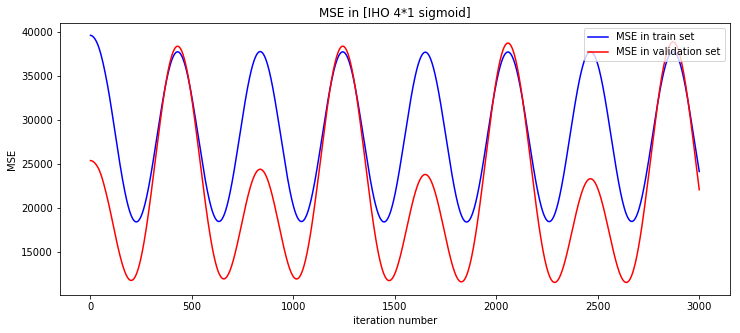

In [56]:
s = pd.read_csv('./gd_sigmoid.csv')
print(min(s['test']))
drawMSE(s,'IHO 4*1 sigmoid')

11503.3


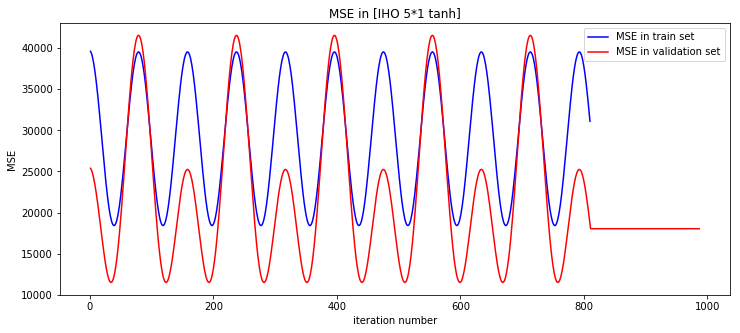

In [60]:
h = pd.read_csv('./gd_tanh.csv')
print(min(h['test']))
drawMSE(h,'IHO 5*1 tanh')

11457.1


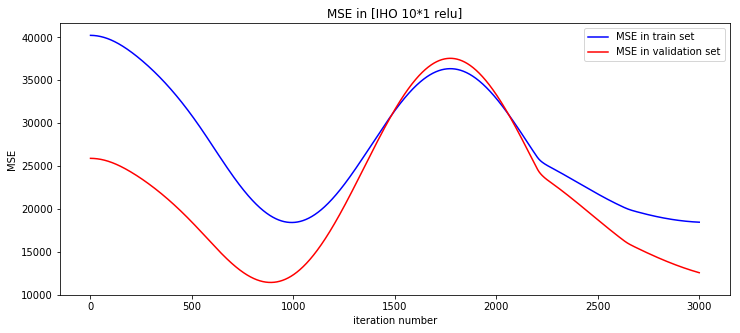

In [59]:
r = pd.read_csv('./gd_relu.csv')
print(min(r['test']))
drawMSE(r,'IHO 10*1 relu')

# 非SGD神经网络+动态学习率

11496.7


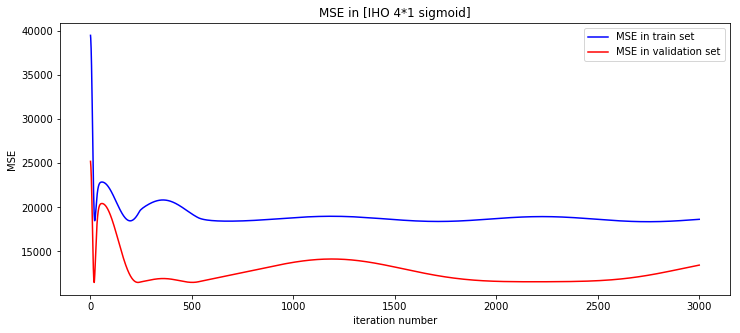

In [53]:
s1 = pd.read_csv('./gd_sigmoid_d.csv')
print(min(s1['test']))
drawMSE(s1,'IHO 4*1 sigmoid')

10383.3


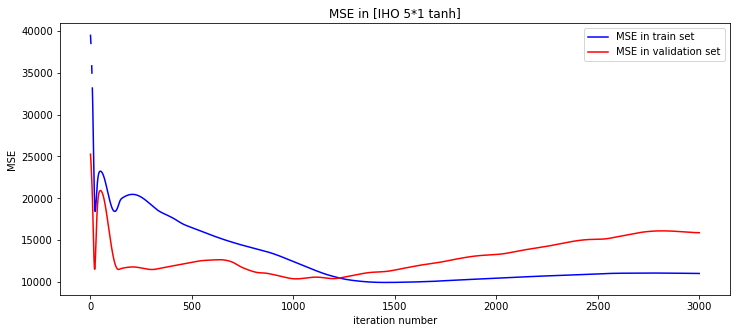

In [54]:
h1 = pd.read_csv('./gd_tanh_d.csv')
print(min(h1['test']))
drawMSE(h1,'IHO 5*1 tanh')

11457.9


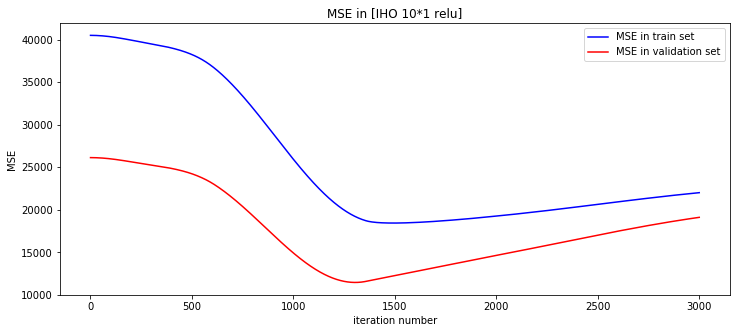

In [55]:
r1 = pd.read_csv('./gd_relu_d.csv')
print(min(r1['test']))
drawMSE(r1,'IHO 10*1 relu')

# 输入-隐藏-输出模型，三种激活函数上的表现

8412.86


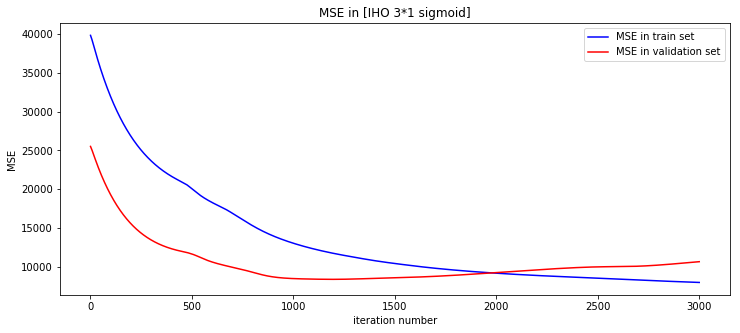

In [36]:
naive = pd.read_csv('./sigmoid3IHO.csv')
print(min(naive['test']))
drawMSE(naive,'IHO 3*1 sigmoid')

6915.71


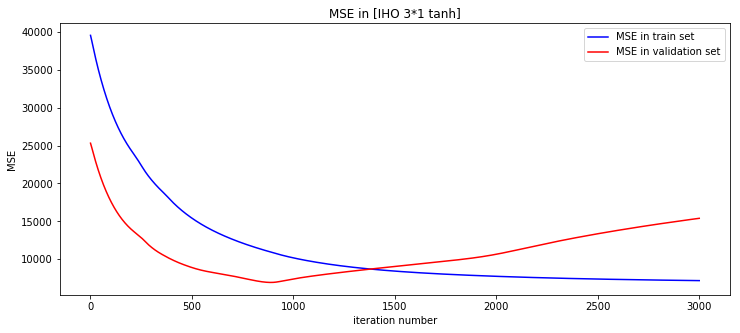

In [35]:
tanh = pd.read_csv('./tanh3IHO.csv')
print(min(tanh['test']))
drawMSE(tanh,'IHO 3*1 tanh')

11777.7


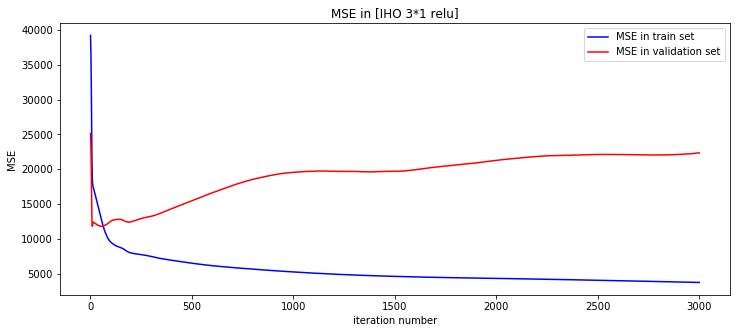

In [34]:
relu = pd.read_csv('./relu3IHO.csv')
print(min(relu['test']))
drawMSE(relu,'IHO 3*1 relu')

# 添加正则项

8449.1


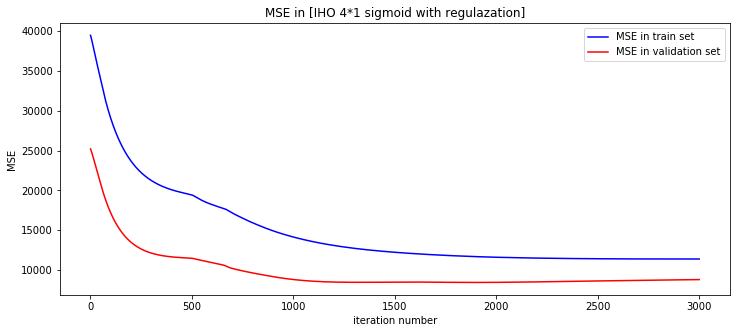

In [27]:
sigr = pd.read_csv('./sig3IHOr.csv')
print(min(sigr['test']))
drawMSE(sigr,'IHO 4*1 sigmoid with regulazation')

7194.87


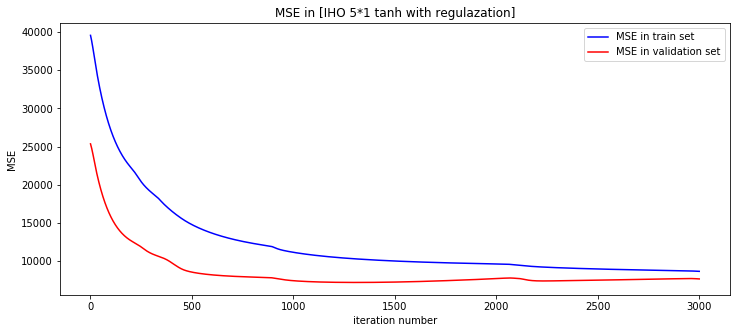

In [26]:
tanhr = pd.read_csv('./tanh3IHOr.csv')
print(min(tanhr['test']))
drawMSE(tanhr,'IHO 5*1 tanh with regulazation')

11241.0


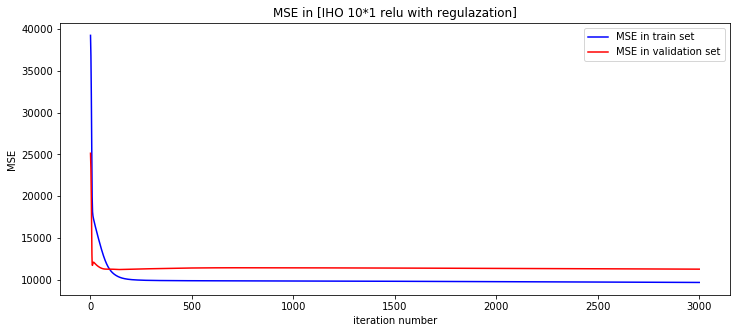

In [64]:
relur = pd.read_csv('./relu3IHOr.csv')
print(min(relur['test']))
drawMSE(relur,'IHO 10*1 relu with regulazation')

# 测试单层隐藏层不同神经元个数

8116.88


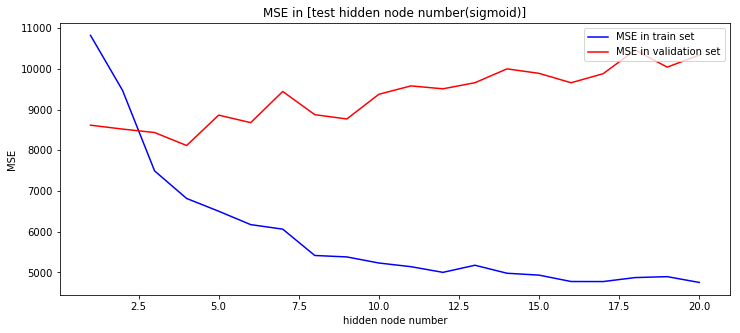

In [29]:
sign = pd.read_csv('./sigmoidIHO.csv')
print(min(sign['test']))
drawMSE(sign,'test hidden node number(sigmoid)', 'hidden node number')

10315.4


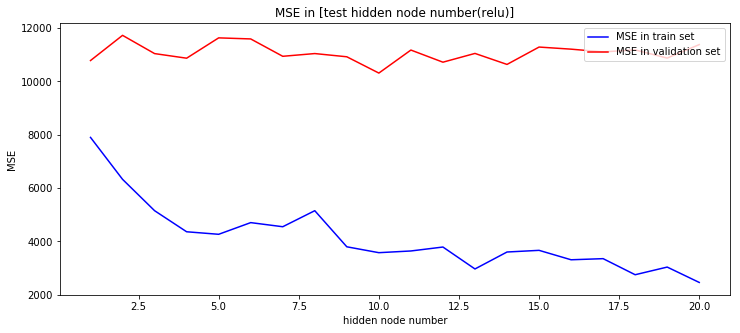

In [30]:
relun = pd.read_csv('./reluIHO.csv')
print(min(relun['test']))
drawMSE(relun,'test hidden node number(relu)', 'hidden node number')

6118.79


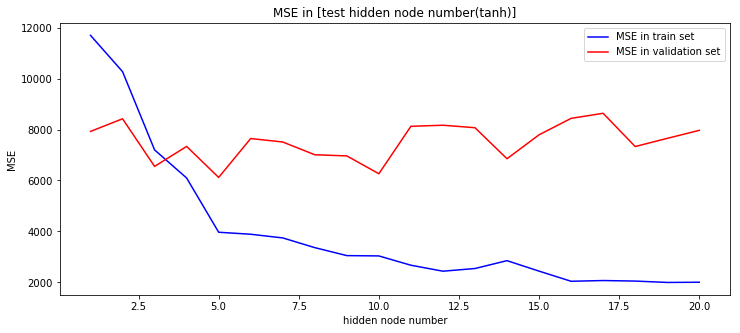

In [31]:
tanhn = pd.read_csv('./tanhIHO.csv')
print(min(tanhn['test']))
drawMSE(tanhn,'test hidden node number(tanh)', 'hidden node number')

# 依据验证集效果调整的动态学习率：
```python
if err_in_valid > last_err_in_valid + bias:
    alpha *= 0.9
```

11503.5


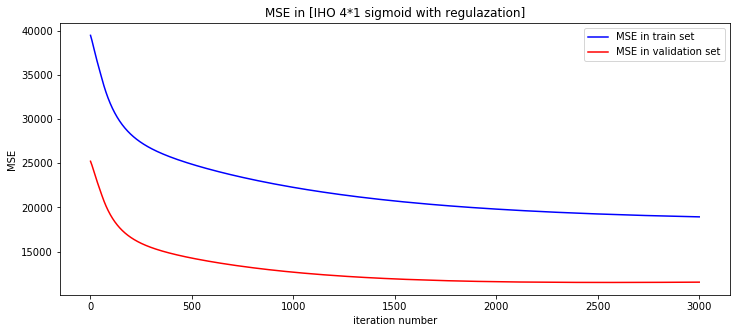

In [39]:
sigrd = pd.read_csv('./sig3IHOrd.csv')
print(min(sigrd['test']))
drawMSE(sigrd,'IHO 4*1 sigmoid with regulazation')

11503.6


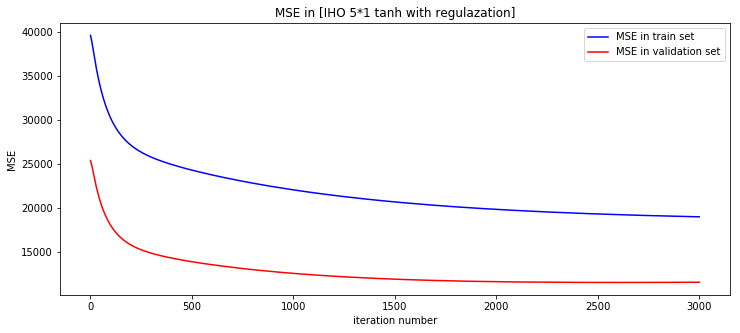

In [38]:
tanhrd = pd.read_csv('./tanh3IHOrd.csv')
print(min(tanhrd['test']))
drawMSE(tanhrd,'IHO 5*1 tanh with regulazation')

10823.4


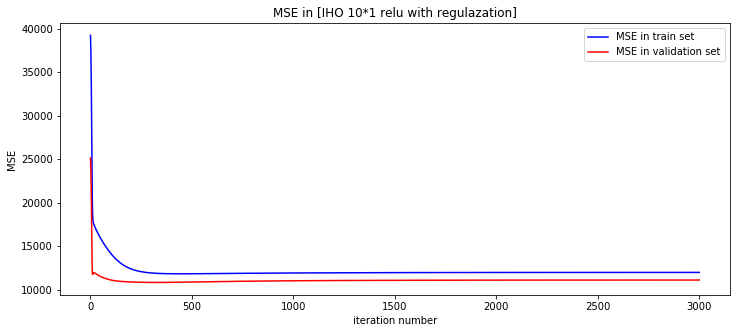

In [65]:
relurd = pd.read_csv('./relu3IHOrd.csv')
print(min(relurd['test']))
drawMSE(relurd,'IHO 10*1 relu with regulazation')

# 测试多层神经网络
测试（5*n)tanh的表现：

4840.41


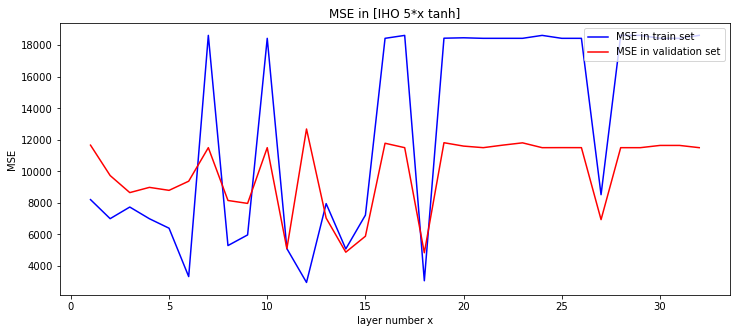

In [63]:
mpl = pd.read_csv('./mpl.csv')
print(min(mpl['test']))
drawMSE(mpl,'IHO 5*x tanh','layer number x')